In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. CRIM: Suç oranı (bölgedeki her kişi başına düşen suç oranı)
2. ZN: 25,000 metrekareden büyük konut arsası yüzdesi
3. INDUS: Kent dışı işletme alanı oranı (iş dışı bölgelerin oranı)
4. CHAS: Charles Nehri yakınlığı (1: nehre bitişik, 0: değil)
5. NOX: Azot oksit konsantrasyonu (ppm cinsinden)
6. RM: Ev başına düşen ortalama oda sayısı
7. AGE: 1940'tan önce inşa edilmiş evlerin oranı
8. DIS: Beş Boston istihdam merkezine olan ağırlıklı mesafe
9. RAD: Radial otoban erişilebilirlik indeksi
10. TAX: 10,000 dolarlık gayrimenkul başına düşen vergi oranı
11. PTRATIO: Öğrenci-öğretmen oranı
12. B: 1000(Bk - 0.63)^2, burada Bk bölgedeki siyahilerin oranıdır
13. LSTAT: Düşük Sosyal Statüdeki İnsanların Yüzdesi
14. MEDV: Evlerin medyan değeri (1000 $ cinsinden)

In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe() #istatistiksel özellikler

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


eksik veri kontrolü

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

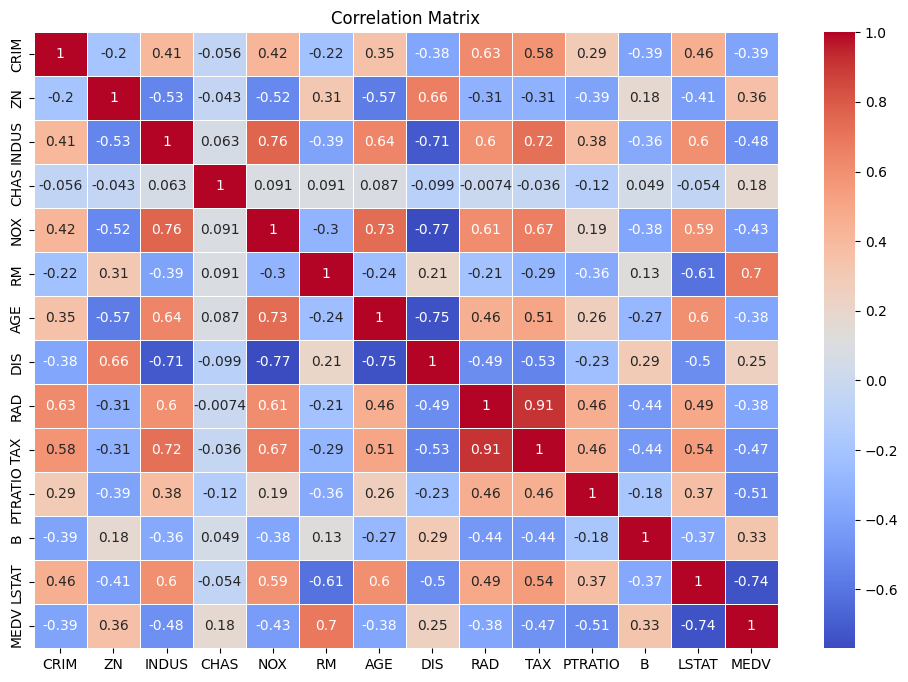

In [ ]:
correlation_matrix = df.corr() #korelasyon matrisi hesaplama

#ısı haritası
plt.figure(figsize= (12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Korelasyon matrisine göre, RM (Ev başına düşen ortalama oda sayısı) ve LSTAT (Düşük Sosyal Statüdeki İnsanların Yüzdesi), MEDV (ev fiyatları) ile güçlü bir ilişkiye sahip olduğu görülüyor.

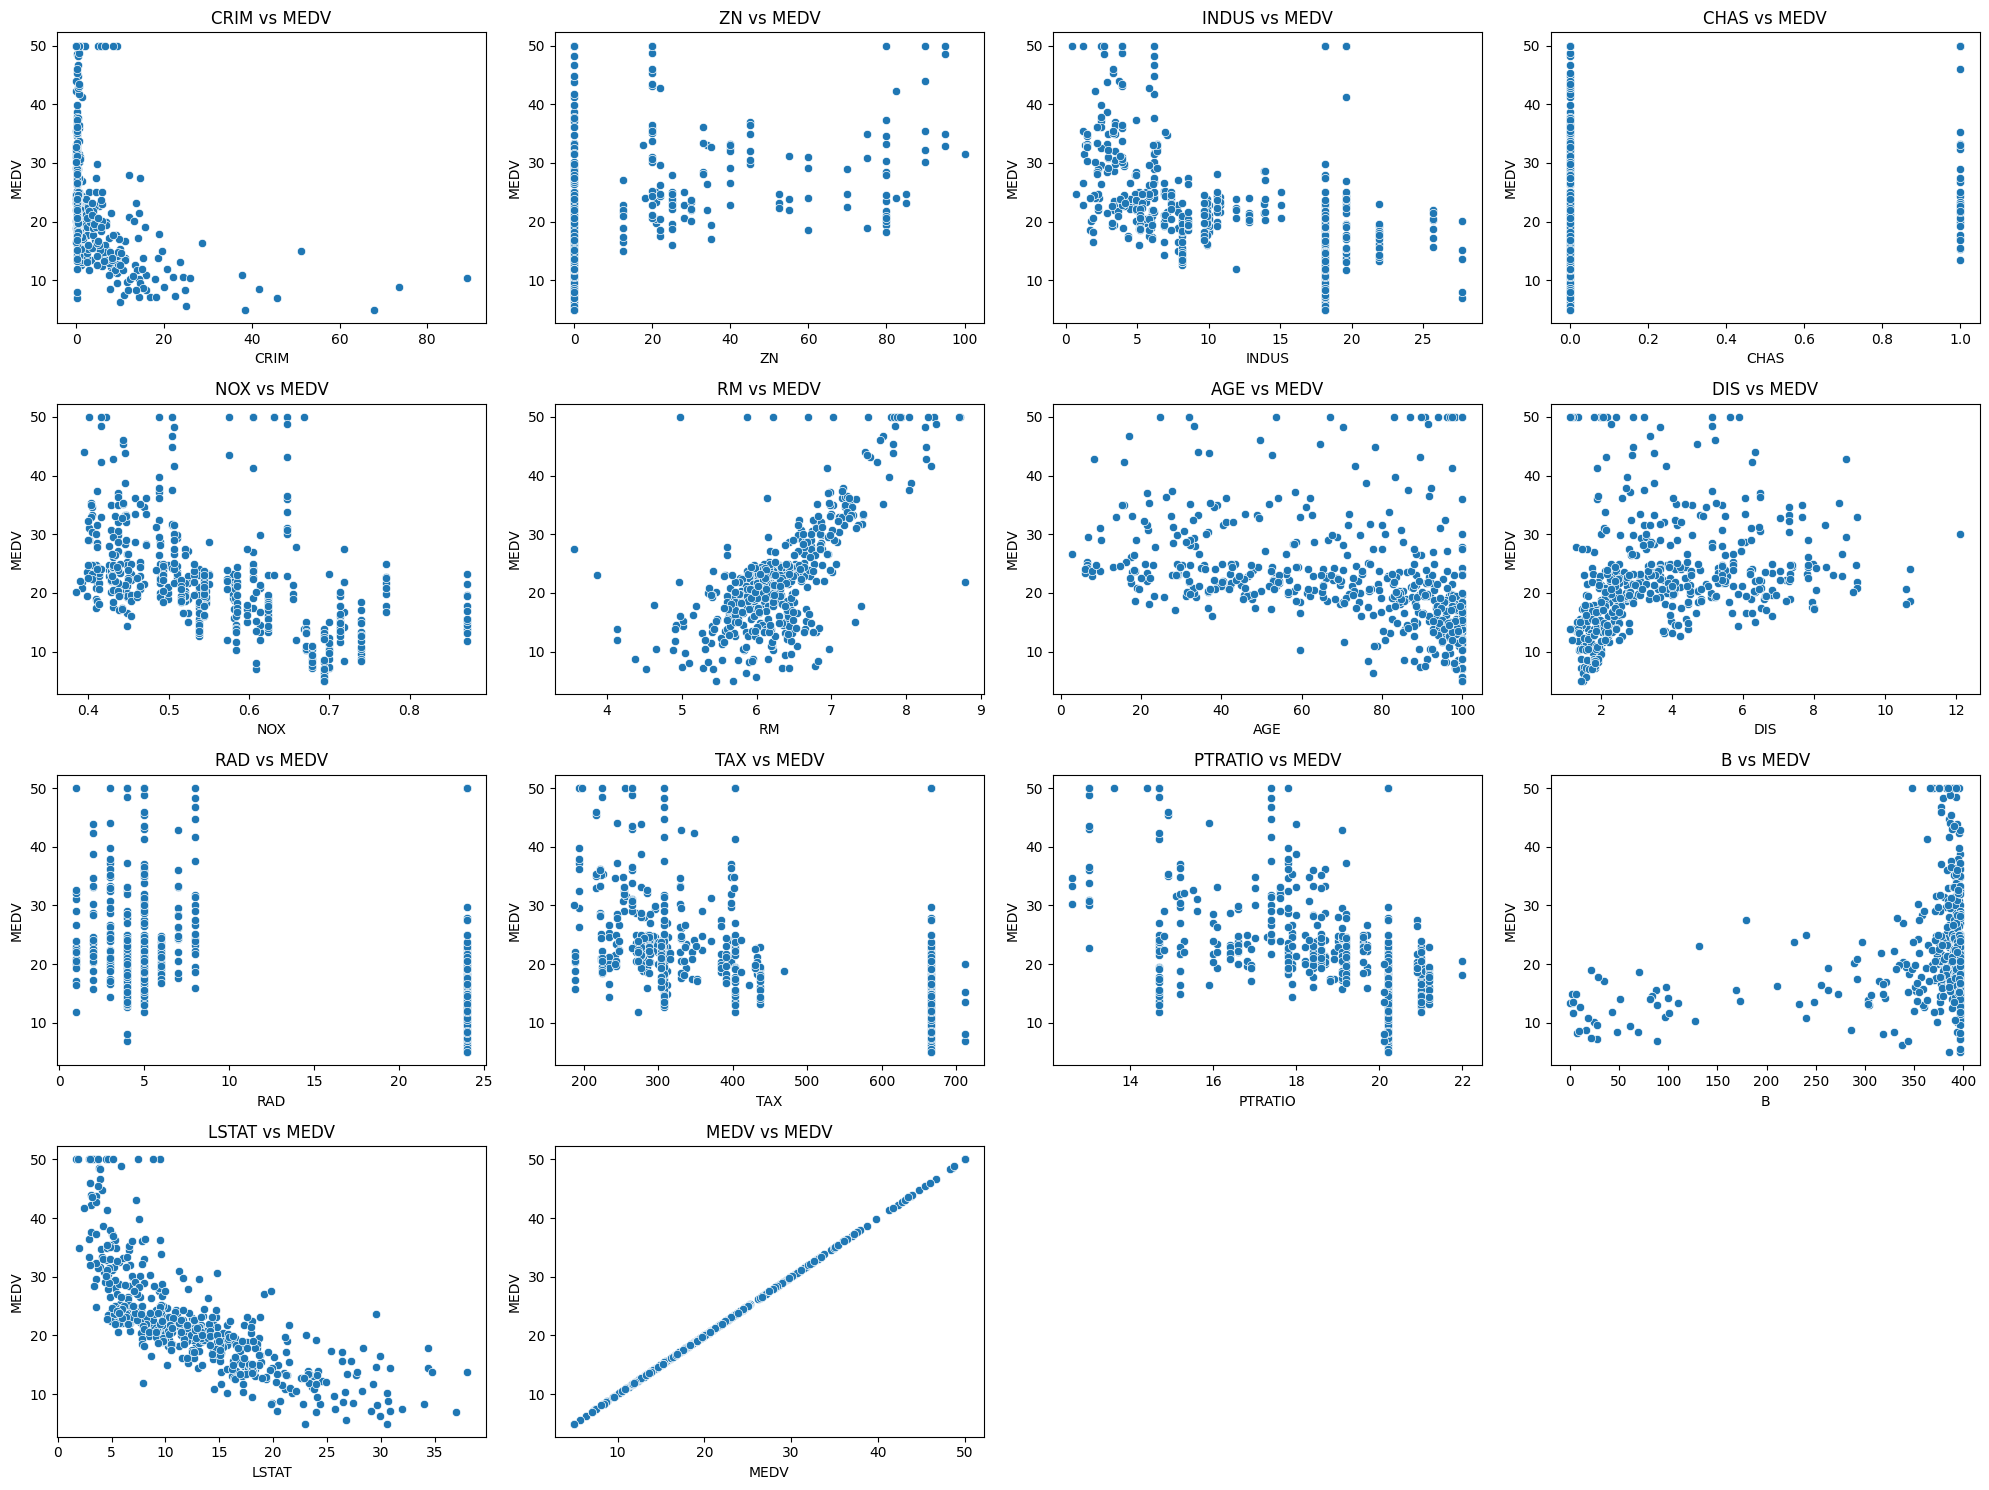

In [ ]:
#özelliklerin MEDV ile dağılım grafikleri

plt.figure(figsize=(20, 15))
for i, column in enumerate(column_names):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=df[column], y=df['MEDV'])
    plt.title(f'{column} vs MEDV')

plt.tight_layout()
plt.show()

Dağılım grafiklerine göre; RM arttıkça MEDV de arttığı,
LSTAT arttıkça MEDV azaldığı görülüyor.

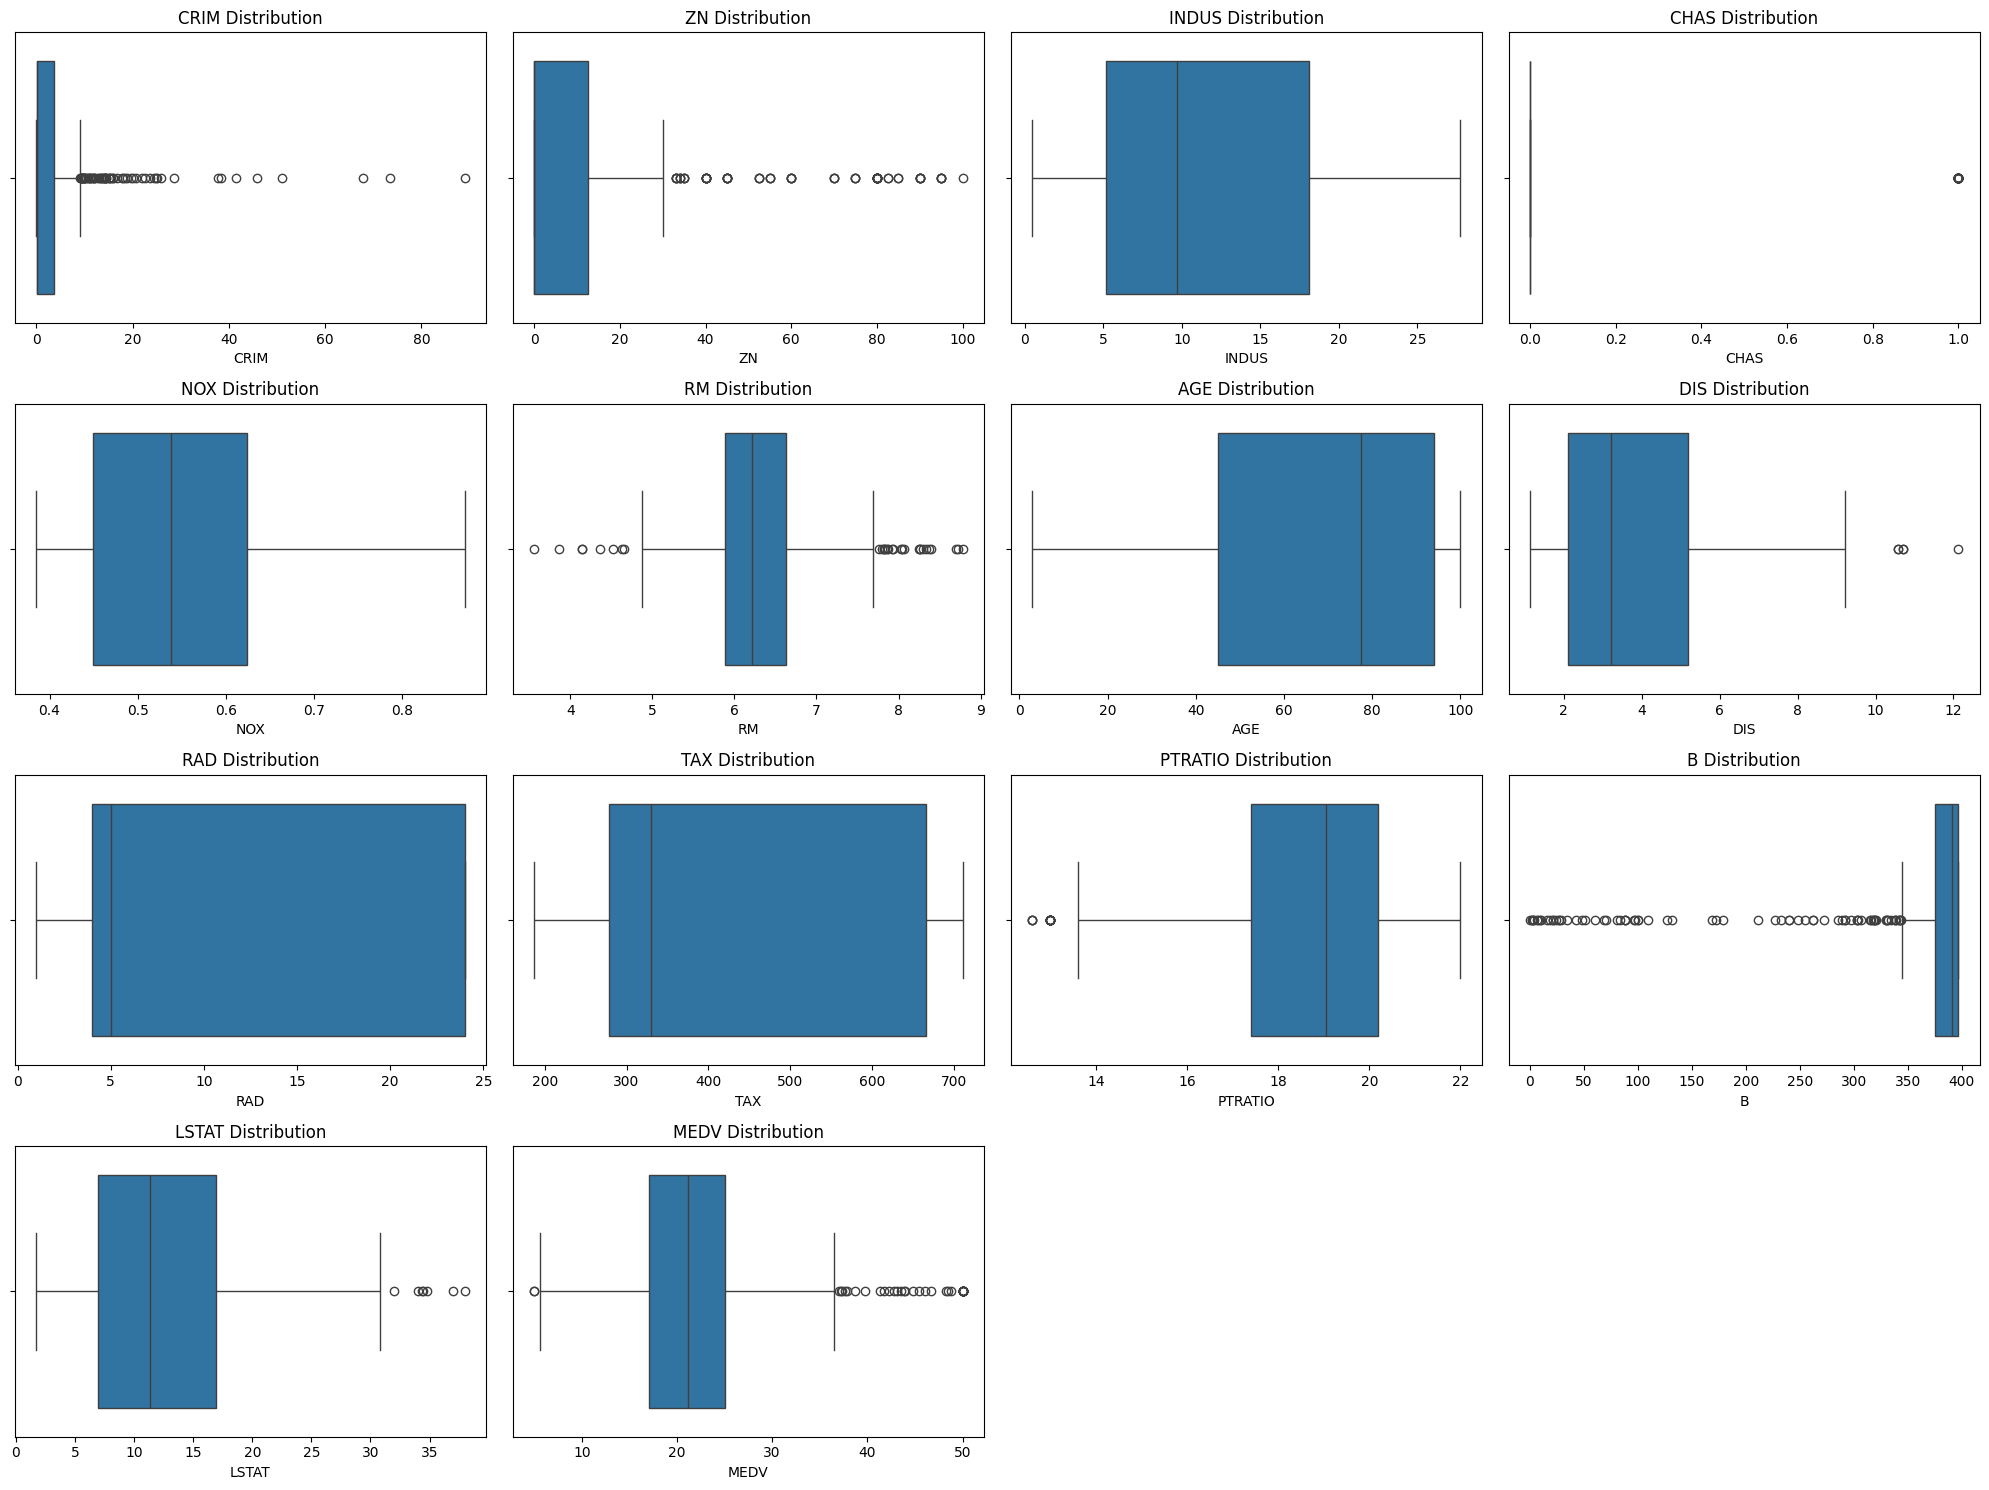

In [ ]:
#Box plot
plt.figure(figsize=(20, 15))
for i, column in enumerate(column_names):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

RM         0.450643
LSTAT      0.351858
DIS        0.071274
CRIM       0.038222
NOX        0.020698
PTRATIO    0.016137
AGE        0.013766
TAX        0.013478
B          0.011788
INDUS      0.005821
RAD        0.004269
CHAS       0.001062
ZN         0.000983
dtype: float64


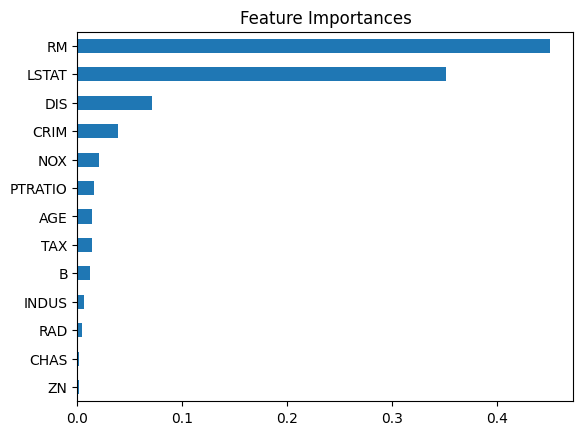

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Bağımsız ve bağımlı değişkenleri ayırma
X = df.drop('MEDV', axis=1)
y = df['MEDV']

#Modeli eğitme
model = RandomForestRegressor()
model.fit(X, y)

#Özellik önem skorları
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

#Görselleştirme
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

Önem derecesi 0.01'in altında olan özellikleri çıkardım.

In [ ]:
#Gereksiz özellikleri belirlenir.
features_to_drop = ['INDUS', 'RAD', 'CHAS', 'ZN']

In [ ]:
#Yeni veri setini oluşturulur.
df_reduced = df.drop(columns=features_to_drop)

In [ ]:
df_reduced.head()

,CRIM,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
X_reduced = df_reduced.drop('MEDV', axis=1)
y = df_reduced['MEDV']